In [81]:
import os.path as op
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import nibabel as nib
import ants
import skimage.filters as skf

Multiclass Otsu thresholds: [ 65.13086 166.18555 290.56055]
Using first class threshold: 65.130859375


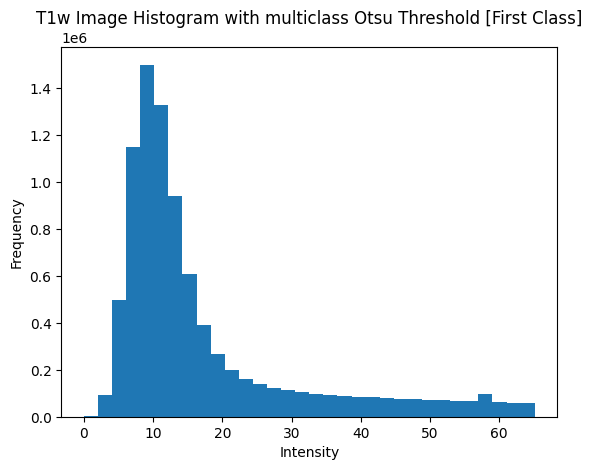

In [92]:
t1_path = op.join("/Users/jmt/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Projects/NoiseMap/T1w_bias.nii.gz")
t1_ai = ants.image_read(t1_path)
t1_img = t1_ai.numpy()
t1_sample = t1_img[t1_img > 0].flatten()

# Yen threshold
otsu_thresh = skf.threshold_multiotsu(t1_sample, classes=4)
print(f"Multiclass Otsu thresholds: {otsu_thresh}")
thresh = otsu_thresh[0]
print(f"Using first class threshold: {thresh}")

# Signal histogram
n, bins, patches = plt.hist(t1_sample, bins=32, range=(0, thresh))

# Bin centers from edges
x = 0.5 * (bins[1:] + bins[:-1])

plt.title("T1w Image Histogram with multiclass Otsu Threshold [First Class]")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

In [93]:
# Make use of the fact that the mode of the Rayleigh distribution is sigma
sigma_mode = x[np.argmax(n)]
print(f"Estimated Rayleigh noise sigma (mode): {sigma_mode}")

Estimated Rayleigh noise sigma (mode): 9.159027099609375


In [97]:
# Alternative: fit Rayleigh distribution to Rayleight peak (below 3*sigma)
from scipy.stats import rayleigh
params = rayleigh.fit(t1_sample[t1_sample < sigma_mode * 3], floc=0)  # Fix location to 0

sigma_fit = params[1]
print(f"Estimated Rayleigh noise sigma (fit): {sigma_fit:0.3f}")

Estimated Rayleigh noise sigma (fit): 9.217
